# Final Project - Plotting inverse Pb/Pb diagrams of the isotope composition of troilite inclusions in iron meteorites

My project uses data from a paper by Blichert-Toft that redetermined the isotopic composition of Solar System primordial lead. 


I used this data to create inverse Pb/Pb diagrams with uncertainty ellipses, and created an inverse isochron via linear regression. The goal was not to solve a problem but to learn how to create the plots I will be making for my undergraduate thesis, which will be adding the Tonganoxie meteorite to the dataset of iron meteorites used in primordial lead studies. 


This involves the mass spectroscopy of individual leaching steps to find the least radiogenic leachate, which represent those least contaminated with terrestrial lead, which is a big concern in the isotopic analysis of meteorites. This is because iron meteorites have such a low uranium content that any resulting radiogenic lead would not change the measured lead compositions within uncertainty. Therefore, a high radiogenic lead compostition can be attributed to terrestrial lead contamination. 


Inverse Pb/Pb diagrams are ideal for primordial lead studies because Pb204/Pb206 is plotted against Pb207/Pb206 and the intercept is the Pb207/Pb206 ratio, which represents radiogenic lead. This essentially flips the isochron, so the most radiogenic samples plot closer to the y-axis with primordial Pb concentrations furthest away. This makes it simple to quickly determine which leachates are the least radiogenic. 

## Step One: Import packages

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

## Step Two: Define Functions

In [59]:
# Function to define arrays from a dataframe based on column headers

    # dataframe = variable name for the dataframe of interest


def array_Pb_data(dataframe):
    
    Pb204_206 = np.array(dataframe['204Pb/206Pb'])
    Pb207_206 = np.array(dataframe['207Pb/206Pb'])
    Pb204_206_2s = np.array(dataframe['2s%'])
    Pb207_206_2s = np.array(dataframe['2s%.1'])
    
    return Pb204_206, Pb207_206, Pb204_206_2s, Pb207_206_2s

In [60]:
# Function to create an uncertainty ellipse where:

    # x_meas = x-value of the datapoint (Pb204/Pb206)
    # y_meas = y-value of the datapoint (Pb207/Pb206)
    # x_2sigma = two sigma uncertainty associated with 'x_meas' (2 sigma of Pb204/Pb206)
    # y_2sigma = two sigma uncertainty associated with 'y_meas' (2 sigma of Pb207/Pb206)
    # rho_xy = correlation coefficient between Pb204/Pb206 and Pb207/206 for the sample
    # k = ellipse scaling factor (1 for 1 sigma, 2 for 2 sigma)
    # n_points = number of points along the circumference of the circle


def uncertainty_ellipse(x_meas, y_meas, x_2sigma, y_2sigma, rho_xy, k, n_points):

    # takes 2 sigma to 1 sigma
    sigma_x = abs(x_2sigma / 2) 
    sigma_y = abs(y_2sigma / 2) 
    
    # creates an array of angles from 0 to 2pi n_points long
    thetas = np.linspace(0, 2*np.pi, n_points)

    # calculates the x and y coordinates creating a circle
    x_circle = np.cos(thetas) 
    y_circle = np.sin(thetas)
    
    # calculates the covariance between Pb204/Pb206 and Pb207/Pb206
    cov_xy = rho_xy * sigma_x * sigma_y 

    # creates the covariance matrix 
    Sigma = np.array([[sigma_x**2, cov_xy],[cov_xy, sigma_y**2]])

    # does Cholesky decomposition A=LL^T
    A = np.linalg.cholesky(Sigma).transpose()

    # combines x and y_circle into a 2D array and linearly transforms the circle into the proper ellipse
    xy_circle = np.column_stack((x_circle, y_circle))
    ellipse_pts = xy_circle @ A

    # scales and translates the ellipse over to the datapoint
    ellipse_meas = xy_circle @ (2*A) + [x_meas, y_meas]

    return ellipse_meas

In [61]:
# Function that defines necessary arrays from a dataframe and creates a scatter plot of the
# data with uncertainty ellipses

    # dataframe = variable name for the dataframe of interest
    # sample_name = string of the meteorite name
    # ax = axis number, allows intgration with plt.subplots()


def plot_Pb_data(dataframe, sample_name, ax):

    # calls the array_Pb_data function to define variables
    Pb204_206, Pb207_206, Pb204_206_2s, Pb207_206_2s = array_Pb_data(dataframe)

    x_values, y_values = isochron(dataframe)

    # lambda function to collect a portion of the 'Sample ID' after the second to last '-'
    dataframe['Short ID'] = dataframe['Sample ID'].apply(lambda x: '-'.join(x.split('-')[-2:]))

    # for loop that iterates through the sample dataframe to create a scatter plot with labels
        # for each leachate step
    for i, row in dataframe.iterrows():
        ax.scatter(row['204Pb/206Pb'], row['207Pb/206Pb'], label=row['Short ID'], zorder=5)

    # for loop that iterates through the sample dataframe to create an uncertainty ellipse
        # for each datapoint
    for i, row in dataframe.iterrows():
        ellipse_meas = uncertainty_ellipse(row['204Pb/206Pb'], row['207Pb/206Pb'],
                                           row['2s%'], row['2s%.1'], 0.99, 2, 100)
        ax.plot(ellipse_meas[:, 0], ellipse_meas[:, 1], alpha=0.5, zorder=5)

    # formatting for the plots    
    ax.legend(title="Sample ID",  loc= "lower right")
    ax.set_xlabel("204Pb/206Pb", fontsize=12)
    ax.set_ylabel("207Pb/206Pb", fontsize=12)
    ax.set_title(f"{sample_name}", fontsize=14)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

## Step Three: Plot Meteorite Data

### Canyon Diablo

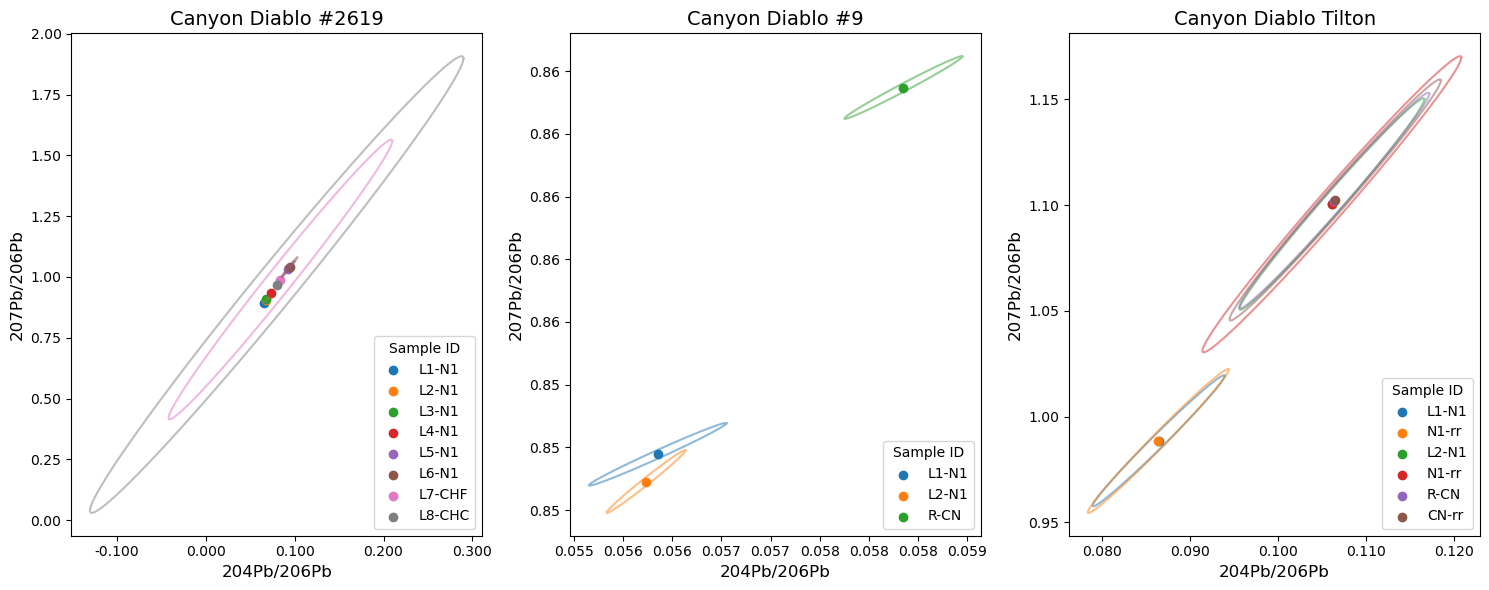

In [62]:
# reads the csv file and creates a dataframe for each sample and calls the array_Pb_data function to define variables

CD2619_pb_isotope_df = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=8)   
CD2619_Pb204_206, CD2619_Pb207_206, CD2619_Pb204_206_2s, CD2619_Pb207_206_2s = array_Pb_data(CD2619_pb_isotope_df)


CD9_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=3, skiprows= range(1,9), header=0)
CD9_Pb204_206, CD9_Pb207_206, CD9_Pb204_206_2s, CD9_Pb207_206_2s = array_Pb_data(CD9_pb_isotope_data)

CDtilton_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=6, skiprows= range(1,12))
CDtilton_Pb204_206, CDtilton_Pb207_206, CDtilton_Pb204_206_2s, CDtilton_Pb207_206_2s = array_Pb_data(CDtilton_pb_isotope_data)



# creates a figure with 3 subplots 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(15, 6))
plot_Pb_data(CD2619_pb_isotope_df, "Canyon Diablo #2619", ax1)
plot_Pb_data(CD9_pb_isotope_data, "Canyon Diablo #9", ax2)
plot_Pb_data(CDtilton_pb_isotope_data, "Canyon Diablo Tilton", ax3)


fig.tight_layout()
plt.show()

### Mundrabilla

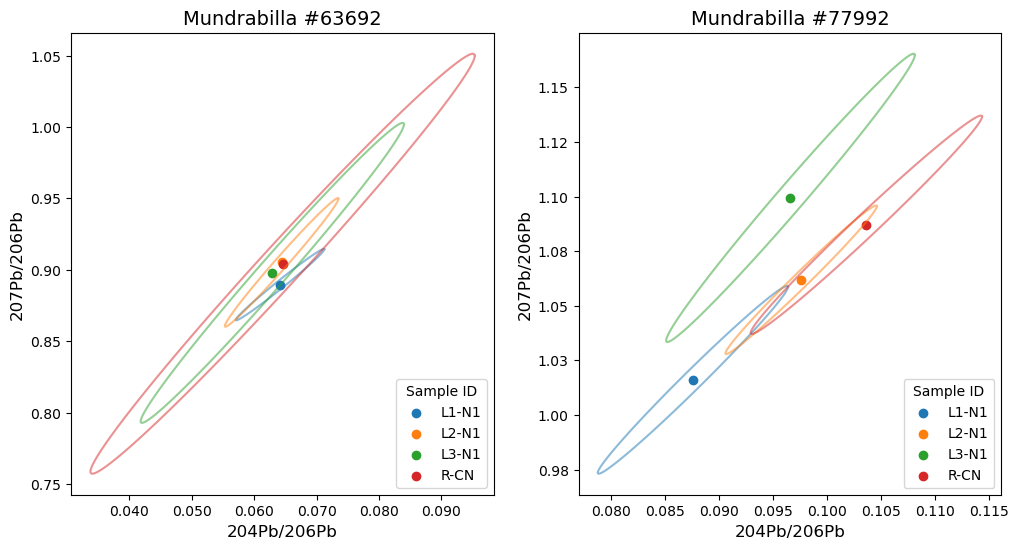

In [63]:
Mb63692_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=4, skiprows= range(1,18))
Mb63692_Pb204_206, Mb63692_Pb207_206, Mb63692_Pb204_206_2s, Mb63692_Pb207_206_2s = array_Pb_data(Mb63692_pb_isotope_data)

Mb77992_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=4, skiprows= range(1,22))
Mb77992_Pb204_206, Mb77992_Pb207_206, Mb77992_Pb204_206_2s, Mb77992_Pb207_206_2s = array_Pb_data(Mb77992_pb_isotope_data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plot_Pb_data(Mb63692_pb_isotope_data, "Mundrabilla #63692", ax1)
plot_Pb_data(Mb77992_pb_isotope_data, "Mundrabilla #77992", ax2)

### Nantan

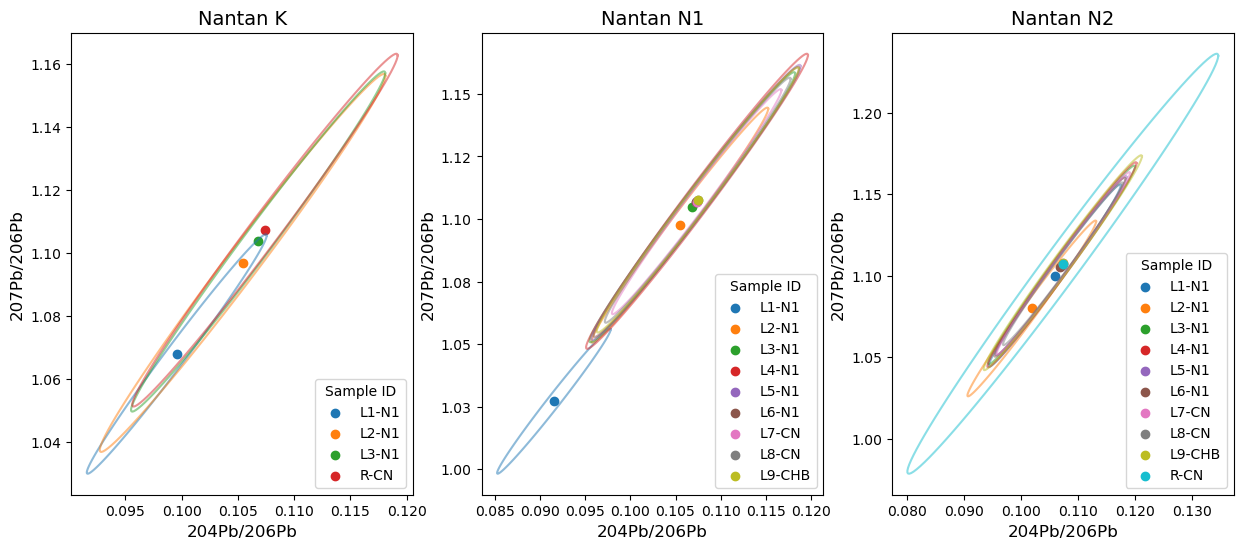

In [64]:
NtnK_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=4, skiprows= range(1,26))
NtnK_Pb204_206, NtnK_Pb207_206, NtnK_Pb204_206_2s, NtnK_Pb207_206_2s = array_Pb_data(NtnK_pb_isotope_data)

NtnN1_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=9, skiprows= range(1,30))
NtnN1_Pb204_206, NtnN1_Pb207_206, NtnN1_Pb204_206_2s, NtnN1_Pb207_206_2s = array_Pb_data(NtnN1_pb_isotope_data)

NtnN2_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=10, skiprows= range(1,39))
NtnN2_Pb204_206, NtnN2_Pb207_206, NtnN2_Pb204_206_2s, NtnN2_Pb207_206_2s = array_Pb_data(NtnN2_pb_isotope_data)



fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
plot_Pb_data(NtnK_pb_isotope_data, "Nantan K", ax1)
plot_Pb_data(NtnN1_pb_isotope_data, "Nantan N1", ax2)
plot_Pb_data(NtnN2_pb_isotope_data, "Nantan N2", ax3)

### Assorted meteorites

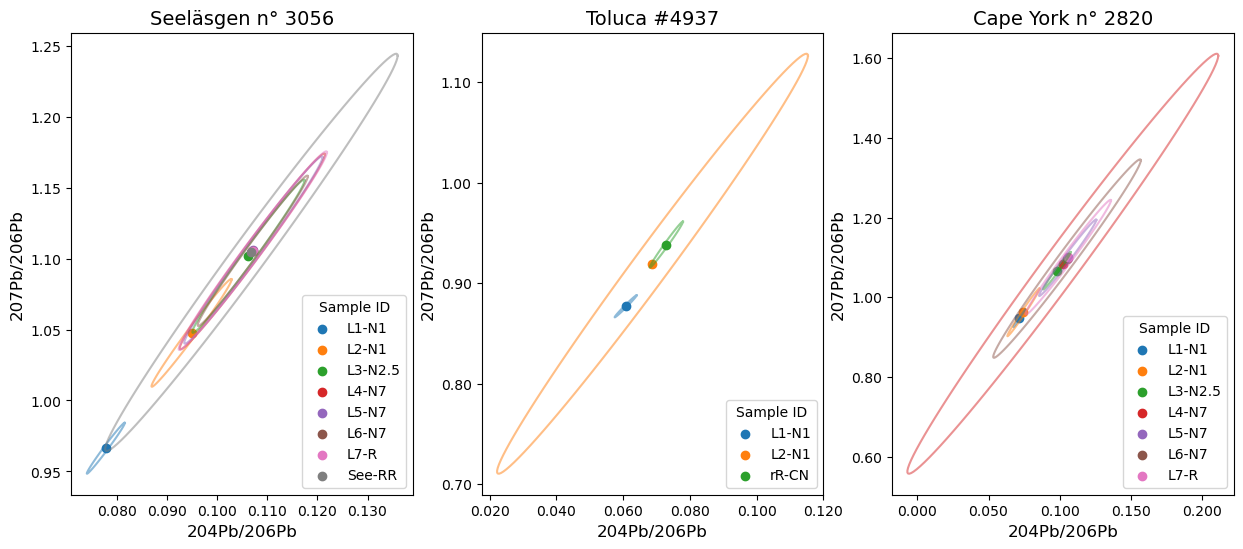

In [65]:
Sg3056_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=8, skiprows= range(1,49))
Sg3056_Pb204_206, Sg3056_Pb207_206, Sg3056_Pb204_206_2s, Sg3056_Pb207_206_2s = array_Pb_data(Sg3056_pb_isotope_data)

Tlca_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=3, skiprows= range(1,57))
Tlca_Pb204_206, Tlca_Pb207_206, Tlca_Pb204_206_2s, Tlca_Pb207_206_2s = array_Pb_data(Tlca_pb_isotope_data)

Cy_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=7, skiprows= range(1,60))
Cy_Pb204_206, Cy_Pb207_206, Cy_Pb204_206_2s, Cy_Pb207_206_2s = array_Pb_data(Cy_pb_isotope_data)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
plot_Pb_data(Sg3056_pb_isotope_data, "Seeläsgen n° 3056", ax1)
plot_Pb_data(Tlca_pb_isotope_data, "Toluca #4937", ax2)
plot_Pb_data(Cy_pb_isotope_data, "Cape York n° 2820", ax3)

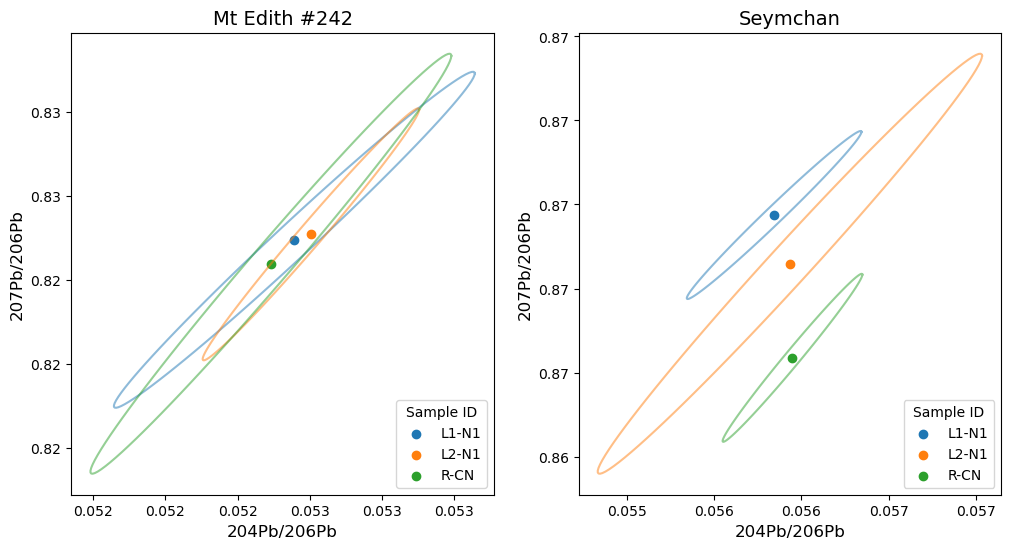

In [66]:
Me_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=3, skiprows= range(1,68))
Me_Pb204_206, Me_Pb207_206, Me_Pb204_206_2s, Me_Pb207_206_2s = array_Pb_data(Me_pb_isotope_data)

Sm_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv", nrows=3, skiprows= range(1,71))
Sm_Pb204_206, Sm_Pb207_206, Sm_Pb204_206_2s, Sm_Pb207_206_2s = array_Pb_data(Sm_pb_isotope_data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plot_Pb_data(Me_pb_isotope_data, "Mt Edith #242", ax1)
plot_Pb_data(Sm_pb_isotope_data, "Seymchan", ax2)

## Step Four

### All meteorite samples plotted with an isochron

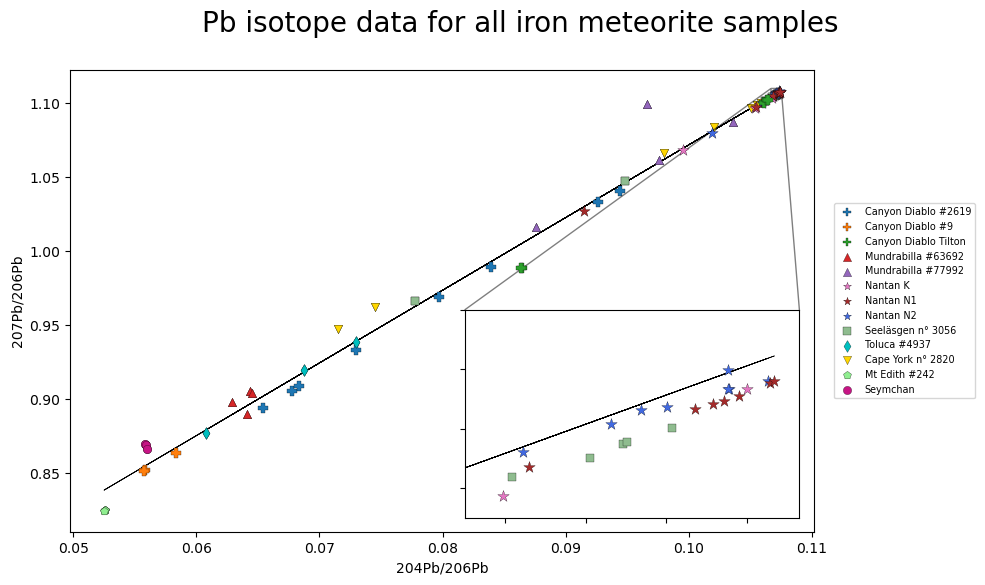

In [67]:
# reads the csv file and creates one dataframe for all the sample and calls the array_Pb_data function to define variables
All_pb_isotope_data = pd.read_csv("Blichert-Toft_lead_data.csv")
All_Pb204_206, All_Pb207_206, All_Pb204_206_2s, All_Pb207_206_2s = array_Pb_data(All_pb_isotope_data)

# create ones vector and design matrix for linear regression based on Pb204/Pb206 (x-axis)
n_samples= len(All_Pb204_206)
ones_vector= np.ones(n_samples)
design_matrix=np.column_stack((All_Pb204_206, ones_vector))

# performs linear regression to get the unknowns vector from the design matrix and Pb207/Pb206 (y-axis)
unknowns_vector, _, _, _ = np.linalg.lstsq(design_matrix, All_Pb207_206, rcond=None)

# collects the slope, and y-intercept from the unknowns vector
slope = unknowns_vector[0]
y_int = unknowns_vector[1]

# defines x and y-values for the isochron
x_values = All_Pb204_206
y_values = slope*x_values+y_int


# creates a figure that plots the isochron and the Pb/Pb data from all of the meteorite samples
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_values, y_values, zorder=0, color= 'k', linewidth=0.5)
ax.scatter(CD2619_Pb204_206, CD2619_Pb207_206, label= 'Canyon Diablo #2619', 
           marker= 'P', edgecolors= 'black', linewidths=0.2, color= 'C0')
ax.scatter(CD9_Pb204_206, CD9_Pb207_206, label= 'Canyon Diablo #9', 
           marker='P', edgecolors= 'black', linewidths=0.2, color= 'C1')
ax.scatter(CDtilton_Pb204_206, CDtilton_Pb207_206, label= 'Canyon Diablo Tilton', 
           marker= 'P', zorder=10, edgecolors= 'black', linewidths=0.2, color= 'C2')
ax.scatter(Mb63692_Pb204_206, Mb63692_Pb207_206, label= 'Mundrabilla #63692', 
           marker='^', edgecolors= 'black', linewidths=0.2, color= 'C3')
ax.scatter(Mb77992_Pb204_206, Mb77992_Pb207_206, label= 'Mundrabilla #77992', 
           marker='^', edgecolors= 'black', linewidths=0.2, color= 'C4')
ax.scatter(NtnK_Pb204_206, NtnK_Pb207_206, label= 'Nantan K', 
           marker='*', zorder=5, edgecolors= 'black', linewidths=0.2, color= 'C6')
ax.scatter(NtnN1_Pb204_206, NtnN1_Pb207_206, label= 'Nantan N1', 
           marker='*', zorder=7, edgecolors= 'black', linewidths=0.2, color= 'brown')
ax.scatter(NtnN2_Pb204_206, NtnN2_Pb207_206, label= 'Nantan N2', 
           marker='*',zorder=6, edgecolors= 'black', linewidths=0.2, color= 'royalblue')
ax.scatter(Sg3056_Pb204_206, Sg3056_Pb207_206, label= 'Seeläsgen n° 3056', 
           marker='s', edgecolors= 'black', linewidths=0.2, color= 'darkseagreen')
ax.scatter(Tlca_Pb204_206, Tlca_Pb207_206, label= 'Toluca #4937', 
           marker='d', edgecolors= 'black', linewidths=0.2, color= 'c')
ax.scatter(Cy_Pb204_206, Cy_Pb207_206, label= 'Cape York n° 2820', color= 'gold', 
           marker='v', edgecolors= 'black', linewidths=0.2)
ax.scatter(Me_Pb204_206, Me_Pb207_206, label= 'Mt Edith #242', color= 'lightgreen', 
           marker='p', edgecolors= 'black', linewidths=0.2)
ax.scatter(Sm_Pb204_206, Sm_Pb207_206, label= 'Seymchan', color= 'mediumvioletred', 
           edgecolors= 'black', linewidths=0.2)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='x-small')

# creates the inset box 
inset_ax = ax.inset_axes(
   [.53, .03, .45, .45], xlim=[0.1067, 0.10753], ylim=[1.103, 1.11], 
    xticklabels=[], yticklabels=[])

# add the isochron and datapoints to the inset
for i_ax in ax, inset_ax:
    i_ax.plot(x_values, y_values, zorder=0, color= 'k', linewidth= 0.5)
    i_ax.scatter(CD2619_Pb204_206, CD2619_Pb207_206, 
                 marker= 'P', edgecolors= 'black', linewidths=0.2, s=50, color= 'C0')
    i_ax.scatter(CD9_Pb204_206, CD9_Pb207_206,  
                 marker='P', edgecolors= 'black', linewidths=0.2, s=50, color= 'C1')
    i_ax.scatter(CDtilton_Pb204_206, CDtilton_Pb207_206,  
                 marker= 'P', zorder=10, edgecolors= 'black', linewidths=0.2, s=50, color= 'C2')
    i_ax.scatter(Mb63692_Pb204_206, Mb63692_Pb207_206,  
                 marker='^', edgecolors= 'black', linewidths=0.2, color= 'C3')
    i_ax.scatter(Mb77992_Pb204_206, Mb77992_Pb207_206,  
                 marker='^', edgecolors= 'black', linewidths=0.2, color= 'C4')
    i_ax.scatter(NtnK_Pb204_206, NtnK_Pb207_206,  
                 marker='*', zorder=5, edgecolors= 'black', linewidths=0.2, s=75, color= 'C6')
    i_ax.scatter(NtnN1_Pb204_206, NtnN1_Pb207_206,  
                 marker='*', zorder=7, edgecolors= 'black', linewidths=0.2, s=75, color= 'brown')
    i_ax.scatter(NtnN2_Pb204_206, NtnN2_Pb207_206,  
                 marker='*',zorder=6, edgecolors= 'black', linewidths=0.2, s=75, color= 'royalblue')
    i_ax.scatter(Sg3056_Pb204_206, Sg3056_Pb207_206,  
                 marker='s', edgecolors= 'black', linewidths=0.2, color= 'darkseagreen')
    i_ax.scatter(Tlca_Pb204_206, Tlca_Pb207_206,  
                 marker='d', edgecolors= 'black', linewidths=0.2, color= 'c')
    i_ax.scatter(Cy_Pb204_206, Cy_Pb207_206, 
                 color= 'gold', marker='v', edgecolors= 'black', linewidths=0.2)
    i_ax.scatter(Me_Pb204_206, Me_Pb207_206, 
                 color= 'lightgreen', marker='p', edgecolors= 'black', linewidths=0.2)
    i_ax.scatter(Sm_Pb204_206, Sm_Pb207_206, 
                 color= 'mediumvioletred', edgecolors= 'black', linewidths=0.2)

# add zoom lines connecting the inset to the plot
ax.indicate_inset_zoom(inset_ax, edgecolor="black")

# formatting for the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel("204Pb/206Pb")
ax.set_ylabel("207Pb/206Pb")
fig.suptitle(f"Pb isotope data for all iron meteorite samples", fontsize=20)
plt.show()